# The Sparks Foundation - Data Science and Business Analytics Internship

Name - Sarang Narayanrao Chandekar

Link - https://internship.thesparksfoundation.info/

Task No.5 - Exploratory Data-Analysis -Sport (Level-Advance)

**Problem Statement -** As a sports analyst, find out the most successfull teams, players and factors contributing win or loss of a team.

## Importing Libraries & Datasets 

**Importing Libraries** which will be needed for the ***Analysis***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Importing Datasets** : We have 2 datasets one names **matches.csv** and second is **deliveries.csv**

In [2]:
Matches = pd.read_csv("C:/Users/ASUS/Desktop/SPARK/Exploratory Data Analysis/Exploratory Data Analysis -Sports (Level-Advanced)/Indian Premier League/matches.csv")
Deliveries = pd.read_csv("C:/Users/ASUS/Desktop/SPARK/Exploratory Data Analysis/Exploratory Data Analysis -Sports (Level-Advanced)/Indian Premier League/deliveries.csv")

## Data Preparation & Processing

In [3]:
Matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
Deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
Matches.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [6]:
Deliveries.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [7]:
Matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [8]:
Deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [9]:
Matches.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

Finding out the **Missing Values and Taking Care of them** from both datasets

In [10]:
Deliveries.nunique()

match_id            756
inning                5
batting_team         15
bowling_team         15
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          8
extra_runs            7
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64

In [11]:
Matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [12]:
Matches.fillna(0,inplace = True)

In [13]:
Matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [14]:
Matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [15]:
Deliveries.fillna(0 , inplace = True)

In [16]:
Deliveries.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

After, removing the **null values or NA values** we can move further for the **Analysis.**

In [17]:
Matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [18]:
Deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


## Data Visualization

Checking the **Unique Values for Seasons**

In [20]:
Matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

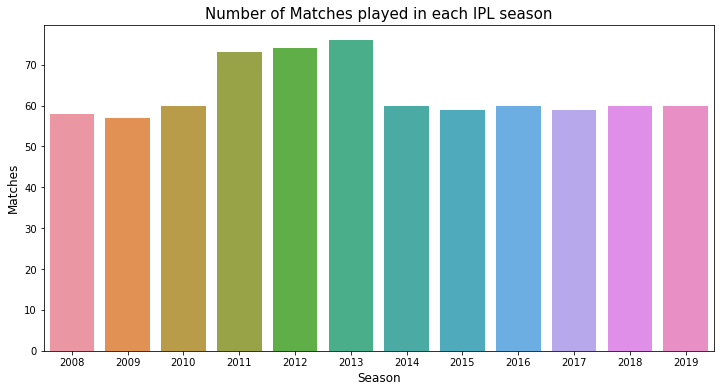

In [21]:
plt.figure(figsize = (12,6))
sns.countplot('season',data=Matches)
plt.title("Number of Matches played in each IPL season",fontsize=15)
plt.xlabel("Season", fontsize=12)
plt.ylabel('Matches',fontsize=12)
plt.show()

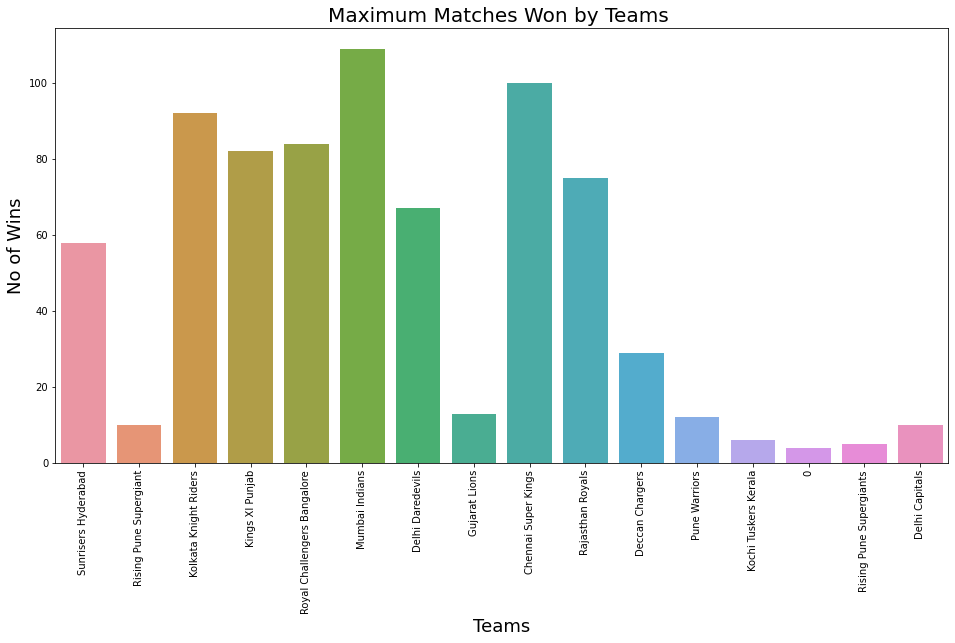

In [78]:
plt.figure(figsize = (16,8))
sns.countplot(x='winner',data=Matches)
plt.title("Maximum Matches Won by Teams ",fontsize=20)
plt.xlabel("Teams",fontsize=18)
plt.ylabel("No of Wins",fontsize=18)
plt.xticks(rotation=90)
plt.show()

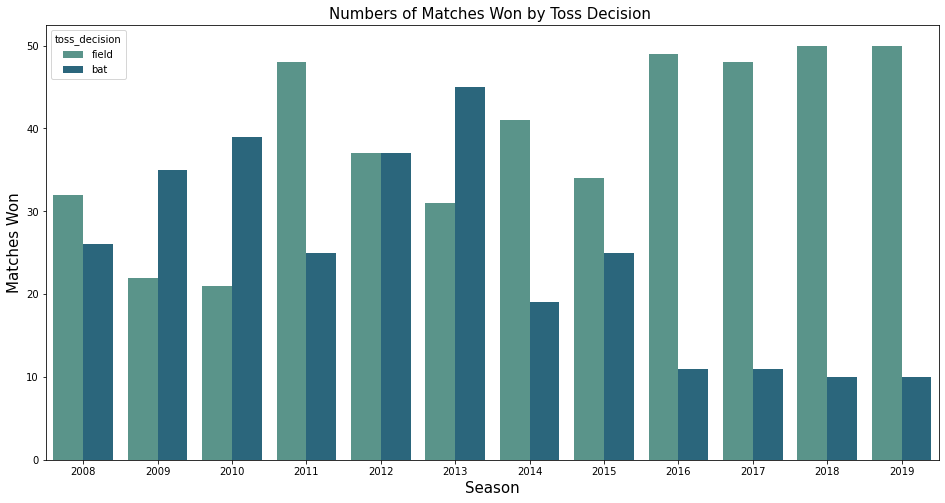

In [23]:
plt.figure(figsize = (16,8))
sns.countplot('season',hue='toss_decision',data=Matches,palette = 'crest')
plt.title("Numbers of Matches Won by Toss Decision ",fontsize=15)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Matches Won",fontsize=15)
plt.show()

[Text(0.5, 1.0, 'Team Won Maximum Toss')]

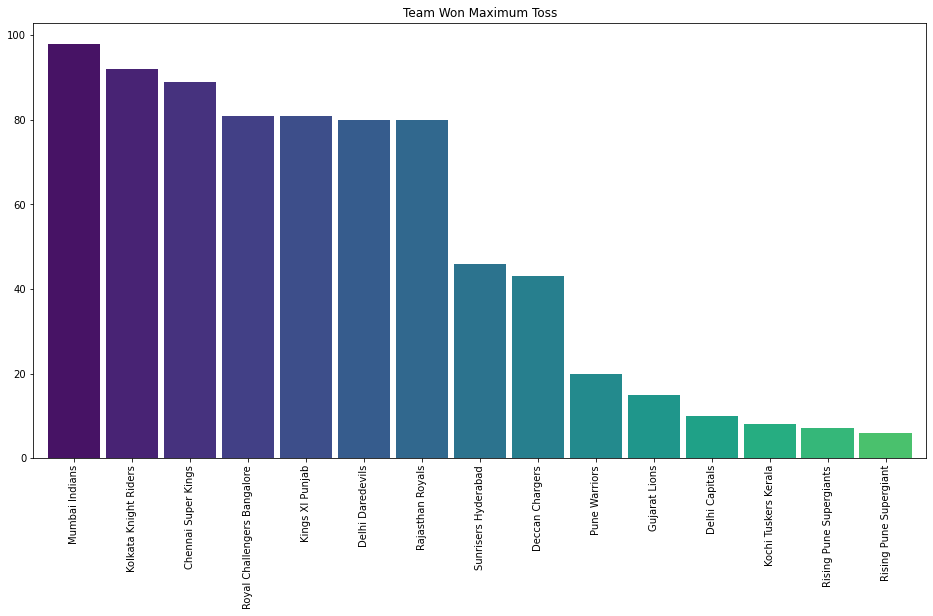

In [24]:
plt.subplots(figsize=(16,8))
Matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('viridis', 20)).set(title = "Team Won Maximum Toss")

In [25]:
Matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

**IPL Season Winners**

In [27]:
Seasonal = Matches.drop_duplicates(subset=['season'], keep='last')
Seasonal[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


**Man of the Match Season-wise of Respective Team**

In [43]:
Seasonal[['season','winner','player_of_match']].reset_index(drop=True).sort_values('season')

,season,winner,player_of_match
1,2008,Rajasthan Royals,YK Pathan
2,2009,Deccan Chargers,A Kumble
3,2010,Chennai Super Kings,SK Raina
4,2011,Chennai Super Kings,M Vijay
5,2012,Kolkata Knight Riders,MS Bisla
6,2013,Mumbai Indians,KA Pollard
7,2014,Kolkata Knight Riders,MK Pandey
8,2015,Mumbai Indians,RG Sharma
9,2016,Sunrisers Hyderabad,BCJ Cutting
0,2017,Mumbai Indians,KH Pandya


**Top-10 Man of the Match:**

Text(0, 0.5, 'Man of the Match')

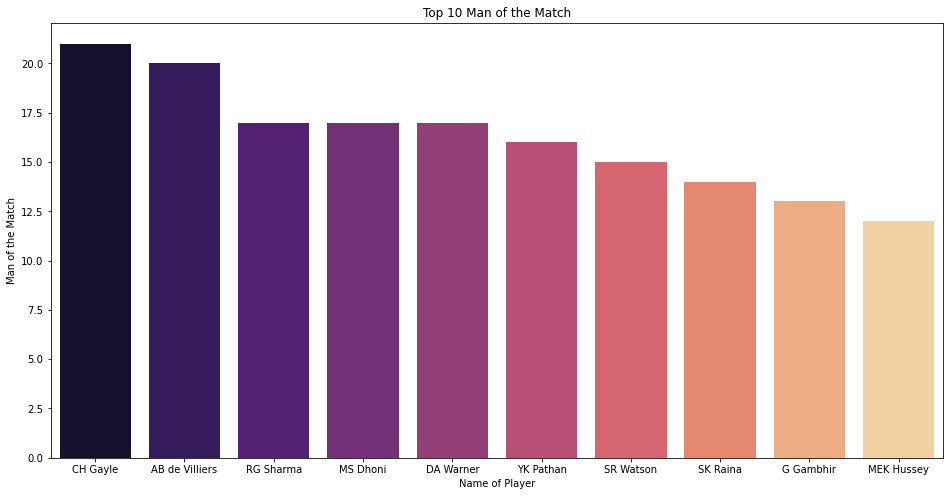

In [57]:
plt.figure(figsize = (16,8))
sns.barplot(Matches.player_of_match.value_counts()[:10].index,Matches.player_of_match.value_counts()[:10], palette = 'magma')
plt.title("Top 10 Man of the Match")
plt.xlabel("Name of Player")
plt.ylabel("Man of the Match")

**Season Won By Respective Teams**

In [66]:
Seasonal["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

Text(0.5, 1.0, 'Season Won By Teams')

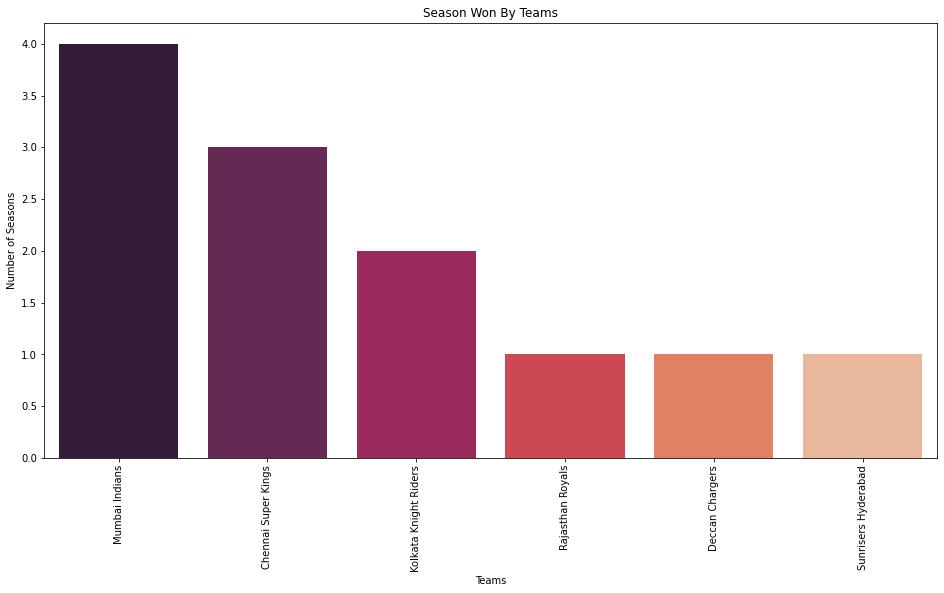

In [79]:
plt.figure(figsize = (16,8))
sns.barplot(Seasonal["winner"].value_counts().index,Seasonal["winner"].value_counts(),palette = 'rocket')
plt.xticks(rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Number of Seasons")
plt.title("Season Won By Teams")

**Top 10 Batsman with highest runrate Over the Seasons**

Text(0, 0.5, 'Runs')

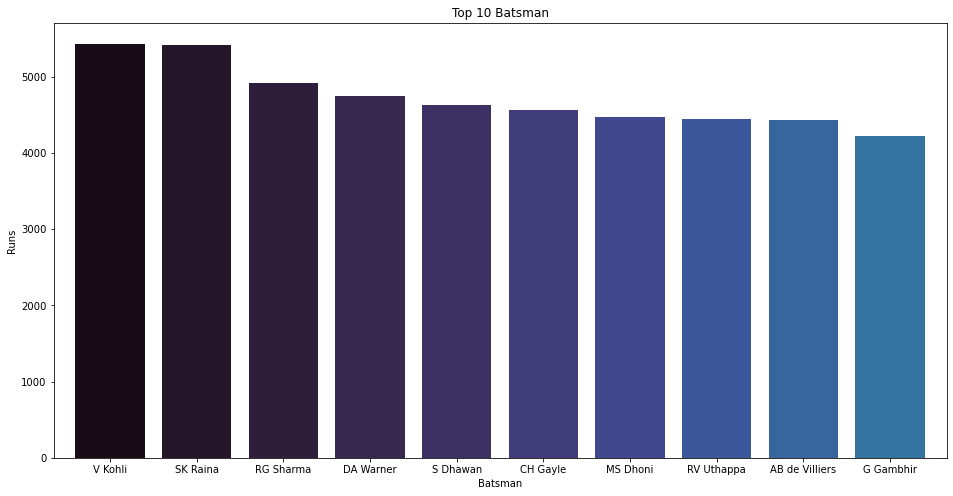

In [98]:
Maximum_runs=Deliveries.groupby(['batsman'])['batsman_runs'].sum()
plt.figure(figsize = (16,8))
max_runs.sort_values(ascending=False)[:10].plot.bar(width = 0.8, color = sns.color_palette('mako',20))
plt.title("Top 10 Batsman")
plt.xlabel("Batsman")
plt.xticks(rotation = 0)
plt.ylabel("Runs")

## Observation

1. Mumbai Indians won maximum number of IPL matches.
2. Based on toss decision,we can say that the teams chose field/bowling won more matches than the teams selected batting first.
3. Over the years, Mumbai Indians won most of the toss.
4. CH Gayle holds 1st rank in man of the match category across the years.
5. Over-all Mumbai Indians has won maximum number of IPL seasons i.e 4 seasons in total.
6. V Kohli holds number 1 rank in Top batsman is highest run score.

## Recommendation 

Recommendations Based on the observations:
1. Teams should be endorsed by the company for their products : Mumbai Indians, Kolkata Knight Riders, Chennai Superkings.
2. Players that should be endorsed by the company for their products : CH Gayle, AB de Villers, RG Sharma.
3. Players like V Kohli, SK Raina, DA Warner, S Dhawan can also be endorsed by the companies as they are few of the top batsman. 